In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import pandas as pd
import numpy as np
import time
import random
import math
import string
import re
from collections import Counter

In [2]:
import konlpy
from konlpy.tag import Komoran

# [Benchmark] DART Open API 이용해서 표준산업분류 가져오기

In [ ]:
pip install dart-fss

In [ ]:
import dart_fss as dart

# Open DART API KEY 설정
api_key='24a0344ba4b111fd5b56a977441a7c7b65fe109f'
dart.set_api_key(api_key=api_key)

In [4]:
corp_list = dart.get_corp_list()
corp_list

Output()

Output()

Output()

Number of companies: 94939

In [7]:
corp_list._load

<bound method CorpList._load of Number of companies: 94604>

In [5]:
cl = list(corp_list)
cl

[[00434003]다코,
 [00434456]일산약품,
 [00430964]굿앤엘에스,
 [00432403]한라판지,
 [00388953]크레디피아제이십오차유동화전문회사,
 [00179984]연방건설산업,
 [00420143]브룩스피알아이오토메이션잉크,
 [00401111]매경아이비아이,
 [00435534]캐드뱅크,
 [00430186]엠와이오피삼차유동화전문유한회사,
 [00430201]엠와이오피이차유동화전문유한회사,
 [00430210]엠와이오피일차유동화전문유한회사,
 [00430229]포스미디어,
 [00140432]축복할렐루야,
 [00426208]한국전자화학,
 [00433262]ConnachtCapitalMarketInvestmentLtd.,
 [00433749]선진아이티,
 [00433785]팀스코리아,
 [00196079]에넥스하이테크,
 [00435048]세이스텝바이스텝혼합형펀드,
 [00435057]유리알파헷지채권혼합형펀드,
 [00108843]한기술정보통신,
 [00443232]다움종합건설,
 [00248293]한국애치슨,
 [00455662]고은상사,
 [00149318]조흥종합건설,
 [00451347]유니즈유통,
 [00415105]창대화장품,
 [00420824]문화종합건설,
 [00389439]한국종합미디어,
 [00454016]아이펜텍,
 [00452072]대홍염공,
 [00437602]지오항공여행사,
 [00365518]헤이아니타코리아,
 [00246967]태산산업개발,
 [00445559]군포종합시장,
 [00444657]기우,
 [00448936]라시도,
 [00405658]예전미디어,
 [00410818]세미가,
 [00416061]대닉스,
 [00448909]인포핸드,
 [00445407]지현개발,
 [00421647]한국부동산신탁제일차유동화전문유한회사,
 [00421425]ISCCaymanLtd.,
 [00423265]연산,
 [00423292]씨케이알유동화전문유한회사,
 [00420602]디에스피,
 [0030750

In [6]:
cl[0]

Label,Data
corp_code,00434003
corp_name,다코
stock_code,None
modify_date,20170630


In [25]:
d1 = {}
for x in cl:
    d1[x.corp_name] = x.corp_code

In [26]:
d1['삼성전자']

'00126380'

In [27]:
samsung = corp_list.find_by_corp_code(d1['삼성전자'])
samsung

Label,Data
corp_code,00126380
corp_name,삼성전자
stock_code,005930
modify_date,20220509
sector,통신 및 방송 장비 제조업
product,"IMT2000 서비스용 동기식 기지국,교환국장비,데이터단말기,동영상휴대폰,핵심칩,반도체제품,사무,계산 및 회계용기계"
corp_cls,Y


In [28]:
samsung.sector

'통신 및 방송 장비 제조업'

In [29]:
len(corp_list.sectors)

161

In [30]:
corp_list.sectors

['1차 비철금속 제조업',
 '1차 철강 제조업',
 '가구 제조업',
 '가전제품 및 정보통신장비 소매업',
 '가정용 기기 제조업',
 '가죽, 가방 및 유사제품 제조업',
 '개인 및 가정용품 임대업',
 '건물 건설업',
 '건물설비 설치 공사업',
 '건축기술, 엔지니어링 및 관련 기술 서비스업',
 '건축자재, 철물 및 난방장치 도매업',
 '경비, 경호 및 탐정업',
 '고무제품 제조업',
 '곡물가공품, 전분 및 전분제품 제조업',
 '골판지, 종이 상자 및 종이용기 제조업',
 '과실, 채소 가공 및 저장 처리업',
 '광고업',
 '교육지원 서비스업',
 '구조용 금속제품, 탱크 및 증기발생기 제조업',
 '귀금속 및 장신용품 제조업',
 '그외 기타 개인 서비스업',
 '그외 기타 운송장비 제조업',
 '그외 기타 전문, 과학 및 기술 서비스업',
 '그외 기타 제품 제조업',
 '금속 주조업',
 '금융 지원 서비스업',
 '기계장비 및 관련 물품 도매업',
 '기록매체 복제업',
 '기반조성 및 시설물 축조관련 전문공사업',
 '기초 의약물질 및 생물학적 제제 제조업',
 '기초 화학물질 제조업',
 '기타 과학기술 서비스업',
 '기타 교육기관',
 '기타 금속 가공제품 제조업',
 '기타 금융업',
 '기타 비금속 광물제품 제조업',
 '기타 비금속광물 광업',
 '기타 사업지원 서비스업',
 '기타 상품 전문 소매업',
 '기타 생활용품 소매업',
 '기타 섬유제품 제조업',
 '기타 식품 제조업',
 '기타 운송관련 서비스업',
 '기타 전기장비 제조업',
 '기타 전문 도매업',
 '기타 전문 서비스업',
 '기타 정보 서비스업',
 '기타 종이 및 판지 제품 제조업',
 '기타 화학제품 제조업',
 '나무제품 제조업',
 '낙농제품 및 식용빙과류 제조업',
 '내화, 비내화 요업제품 제조업',
 '담배 제조업',
 '도로 화물 운송업',
 '도축, 육류 가공 및 저장 처리업',
 '동물용 사료 및 조제식품 제조업',
 '무기

# 2021년 공시기업 목록 불러오기

In [7]:
csm = pd.read_excel('2021_csm.xlsx', index_col = 'Firm')
csm

,3S,AJ네트웍스,AK홀딩스,APS홀딩스,AP시스템,AP위성,BGF,BGF리테일,BNGT,BNK캐피탈,...,휴코드홀딩스,흥구석유,흥국,흥국생명보험,흥국에프엔비,흥국화재,흥아해운,희림,힐세리온,힘스
Firm,,,,,,,,,,,,,,,,,,,,,
3S,1.0000,0.0797,0.1159,0.0229,0.1123,0.1279,0.0931,0.0747,0.0777,0.0441,...,0.0632,0.0480,0.0727,0.0469,0.0562,0.0320,0.0909,0.0595,0.0615,0.1084
AJ네트웍스,0.0797,1.0000,0.1428,0.0478,0.0610,0.0869,0.1184,0.0930,0.0960,0.0717,...,0.0477,0.0167,0.0829,0.0381,0.0882,0.0569,0.0702,0.0829,0.0735,0.0995
AK홀딩스,0.1159,0.1428,1.0000,0.1298,0.0903,0.1417,0.2232,0.1413,0.1147,0.1163,...,0.1122,0.0908,0.0783,0.0913,0.1522,0.1469,0.1549,0.1056,0.1238,0.1541
APS홀딩스,0.0229,0.0478,0.1298,1.0000,0.0256,0.0243,0.1243,0.0473,0.0470,0.0559,...,0.0200,0.0304,0.0502,0.0495,0.0334,0.0912,0.0676,0.0753,0.0445,0.0251
AP시스템,0.1123,0.0610,0.0903,0.0256,1.0000,0.0894,0.0732,0.0597,0.0869,0.0384,...,0.0628,0.0298,0.0813,0.0408,0.0472,0.0465,0.0796,0.0443,0.1180,0.2367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
흥국화재,0.0320,0.0569,0.1469,0.0912,0.0465,0.0561,0.1244,0.0681,0.0450,0.1407,...,0.0448,0.1276,0.0632,0.2366,0.0280,1.0000,0.1260,0.0843,0.0654,0.0548
흥아해운,0.0909,0.0702,0.1549,0.0676,0.0796,0.0850,0.1140,0.0596,0.0626,0.0821,...,0.0553,0.0578,0.0455,0.0923,0.0692,0.1260,1.0000,0.0650,0.0807,0.0729
희림,0.0595,0.0829,0.1056,0.0753,0.0443,0.0578,0.0580,0.0293,0.0407,0.0807,...,0.0346,0.0615,0.0761,0.0600,0.0116,0.0843,0.0650,1.0000,0.0289,0.0261


In [8]:
ak = list(csm.loc['AK홀딩스'].values)
ak

[0.1159,
 0.1428,
 1.0,
 0.1298,
 0.0903,
 0.1417,
 0.2232,
 0.1413,
 0.1147,
 0.1163,
 0.1374,
 0.1599,
 0.2389,
 0.0889,
 0.1854,
 0.1983,
 0.0928,
 0.162,
 0.1263,
 0.1502,
 0.1063,
 0.1393,
 0.1097,
 0.1915,
 0.1829,
 0.1373,
 0.1658,
 0.1661,
 0.1077,
 0.1606,
 0.1277,
 0.0735,
 0.178,
 0.2386,
 0.1106,
 0.1182,
 0.1353,
 0.0951,
 0.1279,
 0.1262,
 0.1451,
 0.0795,
 0.2305,
 0.1505,
 0.1499,
 0.236,
 0.0961,
 0.1511,
 0.1787,
 0.0844,
 0.2106,
 0.1583,
 0.1918,
 0.2366,
 0.1324,
 0.2079,
 0.1893,
 0.2504,
 0.216,
 0.1825,
 0.1545,
 0.1352,
 0.1579,
 0.2762,
 0.1489,
 0.1461,
 0.1538,
 0.2646,
 0.1129,
 0.1351,
 0.1262,
 0.2171,
 0.2029,
 0.1157,
 0.088,
 0.1749,
 0.1348,
 0.1653,
 0.1869,
 0.1584,
 0.1208,
 0.167,
 0.1967,
 0.1762,
 0.1325,
 0.1414,
 0.1402,
 0.1358,
 0.1136,
 0.211,
 0.1291,
 0.1452,
 0.1477,
 0.2087,
 0.1769,
 0.0914,
 0.1625,
 0.0993,
 0.1931,
 0.108,
 0.1257,
 0.1939,
 0.2432,
 0.129,
 0.1516,
 0.1364,
 0.0755,
 0.2248,
 0.1103,
 0.0954,
 0.1074,
 0.1605,
 0.1

In [9]:
import matplotlib.pyplot as plt

<AxesSubplot:ylabel='Density'>

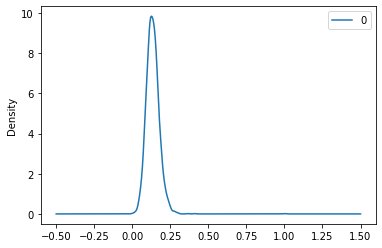

In [18]:
pd.DataFrame(ak).plot.kde()

In [19]:
firms = list(csm.index)
print(len(firms))
firms

2829


['3S',
 'AJ네트웍스',
 'AK홀딩스',
 'APS홀딩스',
 'AP시스템',
 'AP위성',
 'BGF',
 'BGF리테일',
 'BNGT',
 'BNK캐피탈',
 'BYC',
 'CBI',
 'CJ',
 'CJ CGV',
 'CJ ENM',
 'CJ대한통운',
 'CJ씨푸드',
 'CJ제일제당',
 'CJ프레시웨이',
 'CMG제약',
 'CNH',
 'CNT85',
 'CS',
 'CSA 코스믹',
 'CS홀딩스',
 'DB',
 'DB금융스팩8호',
 'DB금융스팩9호',
 'DB생명보험',
 'DB손해보험',
 'DB캐피탈',
 'DB하이텍',
 'DGB금융지주',
 'DL',
 'DL건설',
 'DL에너지',
 'DMS',
 'DN오토모티브',
 'DRB동일',
 'DSC인베스트먼트',
 'DSR',
 'DSR제강',
 'E1',
 'EDGC',
 'EG',
 'EMB',
 'ESR켄달스퀘어리츠',
 'ES큐브',
 'F&amp;F 홀딩스',
 'FSN',
 'GH신소재',
 'GKL',
 'GRT',
 'GS',
 'GST',
 'GS건설',
 'GS글로벌',
 'GS리테일',
 'GS에너지',
 'GS칼텍스',
 'GS파워',
 'HB솔루션',
 'HB테크놀러지',
 'HDC',
 'HDC랩스',
 'HDC현대EP',
 'HDC현대산업개발',
 'HD현대',
 'HJ중공업',
 'HK이노엔',
 'HLB',
 'HLB글로벌',
 'HLB생명과학',
 'HLB제약',
 'HLB테라퓨틱스',
 'HMM',
 'HRS',
 'HSD엔진',
 'IBKS제12호스팩',
 'IBKS제13호스팩',
 'ISC',
 'ITX-AI',
 'JB금융지주',
 'JTC',
 'JW신약',
 'JW중외제약',
 'JYP Ent.',
 'KBI메탈',
 'KBS미디어',
 'KB금융',
 'KB오토시스',
 'KCC건설',
 'KCI',
 'KC그린홀딩스',
 'KC산업',
 'KC코트렐',
 'KD',
 'KEC',
 'KG ETS',
 'KG모빌리언스',


# 기업 기준으로 찾기 (600개 기타법인: 업종 정보 X)

In [31]:
l = []
d2 = {}
for x in firms:
    try:
        code = d1[x]
    except:
        l.append(x)
    
    try:
        info = corp_list.find_by_corp_code(code)
    except:
        l.append(x)
    
    try:
        d2[x] = info.sector
    except:
        l.append(x)

In [32]:
d2

{'3S': '전자부품 제조업',
 'AJ네트웍스': '산업용 기계 및 장비 임대업',
 'AK홀딩스': '기타 금융업',
 'APS홀딩스': '기타 금융업',
 'AP시스템': '특수 목적용 기계 제조업',
 'AP위성': '통신 및 방송 장비 제조업',
 'BGF': '기타 금융업',
 'BGF리테일': '종합 소매업',
 'BNGT': '기계장비 및 관련 물품 도매업',
 'BYC': '봉제의복 제조업',
 'CBI': '자동차 신품 부품 제조업',
 'CJ': '기타 금융업',
 'CJ CGV': '영화, 비디오물, 방송프로그램 제작 및 배급업',
 'CJ ENM': '텔레비전 방송업',
 'CJ대한통운': '도로 화물 운송업',
 'CJ씨푸드': '기타 식품 제조업',
 'CJ제일제당': '기타 식품 제조업',
 'CJ프레시웨이': '음·식료품 및 담배 도매업',
 'CMG제약': '의약품 제조업',
 'CNH': '신탁업 및 집합투자업',
 'CNT85': '건물설비 설치 공사업',
 'CS': '통신 및 방송 장비 제조업',
 'CSA 코스믹': '기타 화학제품 제조업',
 'CS홀딩스': '기타 금융업',
 'DB': '컴퓨터 프로그래밍, 시스템 통합 및 관리업',
 'DB금융스팩8호': '기타 금융업',
 'DB금융스팩9호': '금융 지원 서비스업',
 'DB손해보험': '보험업',
 'DB하이텍': '반도체 제조업',
 'DGB금융지주': '기타 금융업',
 'DL': '기타 금융업',
 'DL건설': '건물 건설업',
 'DMS': '특수 목적용 기계 제조업',
 'DN오토모티브': '일차전지 및 축전지 제조업',
 'DRB동일': '고무제품 제조업',
 'DSC인베스트먼트': '신탁업 및 집합투자업',
 'DSR': '1차 비철금속 제조업',
 'DSR제강': '1차 철강 제조업',
 'E1': '기타 전문 도매업',
 'EDGC': '자연과학 및 공학 연구개발업',
 'EG': '토목 건설업',
 'EMB': '전동기, 발전기 및 전기 

In [33]:
len(d2)

2213

In [34]:
l = list(set(l))
print(len(l))
l

643


['환영철강공업',
 '산은캐피탈',
 '이엘케이',
 '데코앤이',
 '하이딥',
 '리독스바이오',
 '한화에스비아이기업인수목적',
 '스마트골프',
 '일신레져',
 '삼미',
 '광주시민프로축구단',
 '대영씨엔이',
 '동화바이텍스',
 '원텍',
 '에스피반도체통신',
 '메르세데스벤츠파이낸셜서비스코리아',
 '생고뱅코리아홀딩스',
 '서울개인택시복지법인',
 '사우스케이프',
 '세림B&amp;G',
 '스포츠서울',
 '원풍물산',
 '마더스제약',
 '미래에셋캐피탈',
 '시큐아이',
 '피에이치씨',
 '인터코스',
 '디엔지비',
 '롯데물산',
 '엔에이치기업인수목적13호',
 '온페이스',
 '한화갤러리아타임월드',
 '대지개발',
 '케이비국민카드',
 '팍스넷경제티브이',
 '코리아에셋매니지먼트',
 '에스엘엘중앙',
 '제이피에스',
 '에이아이비트',
 '큐젠바이오텍',
 '제이티비씨',
 '오렌지라이프생명보험',
 '코리아테스팅',
 '에스케이지오센트릭',
 '비욘드바이오',
 '한길',
 '노바셀테크놀로지',
 '에스케이어드밴스드',
 '조은세이프',
 '현대엔지니어링',
 '케이비제18호기업인수목적',
 '에어미디어',
 'KMH',
 '티에스엠텍',
 '경향신문사',
 '신영건설',
 '엠앤씨생명과학',
 '광명전기',
 '엘에스아이앤디',
 '상상인이안제2호기업인수목적',
 '다인바이오',
 '글람',
 '나래에너지서비스',
 '부산도시가스',
 '수자원기술',
 '티티씨디펜스',
 '대백저축은행',
 '뉴스테이허브제1호위탁관리부동산투자회사',
 '울진유통농업회사법인',
 '조은저축은행',
 '한국남동발전',
 '파주에너지서비스',
 '두함지개발',
 '미애부',
 '카나리아바이오엠',
 '네오바이오텍',
 '신한캐피탈',
 '신한카드',
 '해원에스티',
 '아크로스',
 '울트라브이',
 '에스바이오메딕스',
 '금빛',
 'SM C&amp;C',
 '지앤엘',
 '대신케이리츠물류1호위탁관리부동산투자회사',
 'SG&

In [35]:
df = pd.DataFrame(columns = ['firm', 'sector'])
df['firm'] = d2.keys()
df['sector'] = d2.values()
df

,firm,sector
0,3S,전자부품 제조업
1,AJ네트웍스,산업용 기계 및 장비 임대업
2,AK홀딩스,기타 금융업
3,APS홀딩스,기타 금융업
4,AP시스템,특수 목적용 기계 제조업
...,...,...
2208,흥국에프엔비,비알코올음료 및 얼음 제조업
2209,흥국화재,보험업
2210,흥아해운,해상 운송업
2211,희림,"건축기술, 엔지니어링 및 관련 기술 서비스업"


In [36]:
len(set(d2.values()))

161

In [37]:
# excel로 저장
df.to_excel('2021_sector.xlsx', index = False)

In [38]:
# 불러오기
df = pd.read_excel('2021_sector.xlsx')
df

,firm,sector
0,3S,전자부품 제조업
1,AJ네트웍스,산업용 기계 및 장비 임대업
2,AK홀딩스,기타 금융업
3,APS홀딩스,기타 금융업
4,AP시스템,특수 목적용 기계 제조업
...,...,...
2208,흥국에프엔비,비알코올음료 및 얼음 제조업
2209,흥국화재,보험업
2210,흥아해운,해상 운송업
2211,희림,"건축기술, 엔지니어링 및 관련 기술 서비스업"


# Fixed Industry Classification

In [73]:
csm = pd.read_excel('2021_csm.xlsx', index_col = 'Firm')

In [117]:
csm1 = csm.copy()
firms = list(csm1.index)
len(firms)

2829

In [118]:
for i in range(len(firms)):
    for j in range(len(firms)):
        if (i >= j):
            csm1.iloc[i, j] = 0
csm1

,3S,AJ네트웍스,AK홀딩스,APS홀딩스,AP시스템,AP위성,BGF,BGF리테일,BNGT,BNK캐피탈,...,휴코드홀딩스,흥구석유,흥국,흥국생명보험,흥국에프엔비,흥국화재,흥아해운,희림,힐세리온,힘스
Firm,,,,,,,,,,,,,,,,,,,,,
3S,0.0,0.0797,0.1159,0.0229,0.1123,0.1279,0.0931,0.0747,0.0777,0.0441,...,0.0632,0.0480,0.0727,0.0469,0.0562,0.0320,0.0909,0.0595,0.0615,0.1084
AJ네트웍스,0.0,0.0000,0.1428,0.0478,0.0610,0.0869,0.1184,0.0930,0.0960,0.0717,...,0.0477,0.0167,0.0829,0.0381,0.0882,0.0569,0.0702,0.0829,0.0735,0.0995
AK홀딩스,0.0,0.0000,0.0000,0.1298,0.0903,0.1417,0.2232,0.1413,0.1147,0.1163,...,0.1122,0.0908,0.0783,0.0913,0.1522,0.1469,0.1549,0.1056,0.1238,0.1541
APS홀딩스,0.0,0.0000,0.0000,0.0000,0.0256,0.0243,0.1243,0.0473,0.0470,0.0559,...,0.0200,0.0304,0.0502,0.0495,0.0334,0.0912,0.0676,0.0753,0.0445,0.0251
AP시스템,0.0,0.0000,0.0000,0.0000,0.0000,0.0894,0.0732,0.0597,0.0869,0.0384,...,0.0628,0.0298,0.0813,0.0408,0.0472,0.0465,0.0796,0.0443,0.1180,0.2367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
흥국화재,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1260,0.0843,0.0654,0.0548
흥아해운,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0650,0.0807,0.0729
희림,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0289,0.0261


In [119]:
# excel로 저장
csm1.to_excel('csm1.xlsx')

In [76]:
# 불러오기
csm1 = pd.read_excel('csm1.xlsx', index_col = 'Firm')
csm1

,3S,AJ네트웍스,AK홀딩스,APS홀딩스,AP시스템,AP위성,BGF,BGF리테일,BNGT,BNK캐피탈,...,휴코드홀딩스,흥구석유,흥국,흥국생명보험,흥국에프엔비,흥국화재,흥아해운,희림,힐세리온,힘스
Firm,,,,,,,,,,,,,,,,,,,,,
3S,0,0.0797,0.1159,0.0229,0.1123,0.1279,0.0931,0.0747,0.0777,0.0441,...,0.0632,0.0480,0.0727,0.0469,0.0562,0.0320,0.0909,0.0595,0.0615,0.1084
AJ네트웍스,0,0.0000,0.1428,0.0478,0.0610,0.0869,0.1184,0.0930,0.0960,0.0717,...,0.0477,0.0167,0.0829,0.0381,0.0882,0.0569,0.0702,0.0829,0.0735,0.0995
AK홀딩스,0,0.0000,0.0000,0.1298,0.0903,0.1417,0.2232,0.1413,0.1147,0.1163,...,0.1122,0.0908,0.0783,0.0913,0.1522,0.1469,0.1549,0.1056,0.1238,0.1541
APS홀딩스,0,0.0000,0.0000,0.0000,0.0256,0.0243,0.1243,0.0473,0.0470,0.0559,...,0.0200,0.0304,0.0502,0.0495,0.0334,0.0912,0.0676,0.0753,0.0445,0.0251
AP시스템,0,0.0000,0.0000,0.0000,0.0000,0.0894,0.0732,0.0597,0.0869,0.0384,...,0.0628,0.0298,0.0813,0.0408,0.0472,0.0465,0.0796,0.0443,0.1180,0.2367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
흥국화재,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1260,0.0843,0.0654,0.0548
흥아해운,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0650,0.0807,0.0729
희림,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0289,0.0261


In [77]:
firms = list(csm1.index)
len(firms)

2829

In [45]:
dtm3 = pd.read_pickle("2021_dtm_binary")
dtm3 = dtm3.set_index('Firm', drop = True)
dtm3

,가감,가게,가격결정,가격상한,가격연동제,가격차별,가격파괴,가격표,가결,가경,...,힐,힐러리,힐링,힐스,힐스테이트,힐튼,힘,힘겨루기,힘줄,힙합
Firm,,,,,,,,,,,,,,,,,,,,,
3S,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AJ네트웍스,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AK홀딩스,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
APS홀딩스,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AP시스템,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
흥국화재,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
흥아해운,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
희림,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [121]:
# cosine similarity matrix 만들 때 계산 시간 단축하기 위한 작업
dic = {}
for i in firms:
    dic[i] = list(dtm3.loc[i].values)

In [125]:
# csm1은 그대로 두고 csm2를 변형
csm2 = csm1.copy()

In [122]:
from numpy import dot
from numpy.linalg import norm

In [123]:
def sim(x, y):
    result = round(dot(x, y) / (norm(x) * (norm(y))), 4)
    return result

# Forming Fixed Industry Classification

In [ ]:
while len(csm2.index) > 161:
    # Find two most similar industries
    series = csm2.max()
    ind1 = series[series == series.max()].index[0]
    ind2 = csm2[ind1].idxmax()
    
    # csm2에 ind1 + ind2 column 추가
    csm2[ind1 + ',' + ind2] = 0
    
    # form a new industry
    ind1_list = ind1.split(',')
    ind2_list = ind2.split(',')
    new_ind = ind1_list + ind2_list

    # calculate similarity between the new industry and all other industries
    for i in csm2.index:
        other_ind = i.split(',')
        total = 0
        for j in other_ind:
            for k in new_ind:
                total += sim(dic[j], dic[k])
        csm2.loc[i, ind1 + ',' + ind2] = total / (len(new_ind) * len(other_ind))

    # csm2에 ind1 + ind2 row 추가
    csm2.loc[ind1 + ',' + ind2] = 0
    
    # csm2에서 ind1, ind2 row, column 제거
    csm2 = csm2.drop(ind1, axis = 0)
    csm2 = csm2.drop(ind1, axis = 1)
    csm2 = csm2.drop(ind2, axis = 0)
    csm2 = csm2.drop(ind2, axis = 1)
    
    print(len(csm2.index))

In [151]:
csm2.to_excel('csm2_374.xlsx')
csm2

,CJ프레시웨이,HLB테라퓨틱스,KR모터스,KT서브마린,SG&amp;G,SH에너지화학,SK실트론,YW,갤럭시아에스엠,경동나비엔,...,"유아이엘,서원인텍,와이팜,한솔테크닉스,코텍,프리젠,디스플레이텍,우전","케이티,지니뮤직,드림어스컴퍼니,소리바다,NHN벅스,하이브,JYP Ent.,큐브엔터,와이지엔터테인먼트,YG PLUS,에프엔씨엔터,엔터미디어,TJ미디어,THE E&amp;M,세영디앤씨,덱스터,레드로버,NEW,더콘텐츠온,초록뱀미디어,뿌리깊은나무들,큐로홀딩스,CJ ENM,CJ,케이티스카이라이프,아이톡시,삼화네트웍스,에스엠,SM C&amp;C,팬엔터테인먼트,에이스토리,빅텐츠,콘텐트리중앙,데이드림엔터,키이스트,스튜디오산타클로스,판타지오,아이에이치큐,이매진아시아,아이오케이,애니플러스,대원미디어,키다리스튜디오,디앤씨미디어,미스터블루,스튜디오드래곤,판도라티비,키네마스터,와이즈버즈,미래테크놀로지,에코마케팅,플레이디,나스미디어,인크로스,팍스넷,와이더플래닛,이엠넷,케어랩스,옐로디지털마케팅,FSN,아시아경제,비플라이소프트,줌인터넷,다나와,씽크풀,지투알,오리콤,제일기획,이노션,지어소프트,위메이드플레이,로지스몬,썸에이지,넥슨게임즈,컴투스홀딩스,컴투스,데브시스터즈,넥스쳐,넷마블네오,넷마블,넵튠,모비릭스,펄어비스,크래프톤,카카오게임즈,엑스엘게임즈,위메이드맥스,위메이드,룽투코리아,베노홀딩스,팡스카이,액토즈소프트,드래곤플라이,코원플레이,넥슨지티,조이시티,액션스퀘어,바른손이앤에이,플레이위드,베스파,엔에이치엔,카카오,NAVER,엔비티,아프리카TV,알티캐스트,코퍼스코리아,래몽래인,한빛소프트,네오위즈홀딩스,네오위즈,스포피드,미투젠,미투온,더블유게임즈,웹젠,엠게임,와이제이엠게임즈,KH 전자,블루콤,에스앤케이","호텔롯데,한화호텔앤드리조트,용평리조트,아난티,뉴경기관광,기흥관광개발,대지개발,남화산업,이월드","대림통상,다산","태웅,원일특강,세아홀딩스,세아베스틸지주,세아창원특수강,동일산업,광진실업,현대제철,환영철강공업,KISCO홀딩스,한국철강,제이스코홀딩스,세아특수강,동일제강,동일철강,대호특수강,부국철강,대동스틸,해원에스티,금강철강,경남스틸,대창스틸,동국산업,동국S&amp;C,디씨엠,티플랙스,KG스틸,현대비앤지스틸,쎄니트,제낙스,DSR,한국선재","바이오솔루션,미라셀,테고사이언스,안트로젠,프로스테믹스,로킷헬스케어,휴코드홀딩스,알바이오,메디포스트,엘앤씨바이오,에스티씨라이프,이노진,현대퓨처넷,현대바이오랜드,케어젠,서린바이오,라파스,제노포커스,아미코젠,에이치엘사이언스,에스앤디,다인바이오,비피도,네오크레마,쿼럼바이오,HLB글로벌,아이큐어,바이오시네틱스,대봉엘에스,에스씨엠생명과학,네이처셀,코아스템,스템랩,에스바이오메딕스,비엘,압타바이오,셀리버리,에이비엘바이오,앱클론,노바셀테크놀로지,펨토바이오메드,셀리드,박셀바이오,지아이이노베이션,메드팩토,네오이뮨텍,카이노스메드,엔지켐생명과학,파멥신,알테오젠,아이진,압타머사이언스,바이오인프라생명과학,HLB생명과학,올릭스,올리패스,헬릭스미스,뉴라클사이언스,큐리언트,비욘드바이오,오스코텍,나이벡,지놈앤컴퍼니,고바이오랩,바이오니아,툴젠,무진메디,노브메타파마,다이노나,코미팜,엔케이맥스,안지오랩,녹십자웰빙,코오롱티슈진,엔솔바이오사이언스,팬젠,선바이오,에스티팜,에스케이바이오팜,프레스티지바이오로직스,폴루스,파로스젠,일동홀딩스,일동제약,셀젠텍,바이오이즈,에이비온,피플바이오,퓨쳐켐,듀켐바이오,KH 필룩스,젬백스,브릿지바이오,차바이오텍,지씨셀,녹십자셀,켐온,인바이츠바이오코아,노터스,크로넥스,아퓨어스,옵티팜,제넨바이오,오리엔트바이오,진원생명과학,메디포럼,플럼라인생명과학,메디콕스,엠디헬스케어,HLB,SK케미칼,SK바이오사이언스,유바이오로직스,큐로컴,비보존,메디프론,코오롱생명과학,프리시젼바이오,수젠텍,피씨엘,켈스,미코바이오메드,퀀타매트릭스,에스디바이오센서,바이오노트,마이크로디지탈,프로테옴텍,휴마시스,바이오다인,클리노믹스,EDGC,소마젠,엔젠바이오,셀레믹스,지노믹트리,젠큐릭스,제놀루션,디엑스앤브이엑스,티씨엠생명과학,랩지노믹스,오상헬스케어,녹십자엠에스,바디텍메드,나노엔텍,파나진,싸이토젠,얼라인드,솔젠트,씨젠,다이오진,메디안디노스틱,제노텍,에스엔피제네틱스,디엔에이링크,마크로젠,아스타,와이디생명과학,엑세스바이오,진매트릭스,이노테라피,더블유에스아이,세종메디칼,이오플로우,유엑스엔,진바이오텍,우진비앤지,인트론바이오,티스템,애드바이오텍,코디엠,에이비프로바이오,디아크,에스엘에스바이오,드림씨아이에스,바이오톡스텍,제넥신,에스티큐브,지더블유바이텍,브이티지엠피,메디젠휴먼케어,마이지놈박스,인바이오젠,아스트로젠,레고켐바이오,펩트론,지엘팜텍,메디톡스,디에스케이,휴젤,제테마,파마리서치바이오,파마리서치,알에프텍,아크로스,메드파크,울트라브이,서울리거,멕아이씨에스,메디아나,나눔테크,오스테오닉,에디슨INNO,엘앤케이바이오,엔도비전,휴벡셀,메디쎄이,루트락,티앤엘,바이오프로테크,쎌마테라퓨틱스,한국비엔씨,바이오플러스,코렌텍,솔고바이오,바텍,레이언스,디알텍,디알젬,제노레이,레이,엔에스엔,리메드,케어룸의료산업,셀바스헬스케어,셀바스AI,인바디,오스템임플란트,덴티움,메가젠임플란트,덴티스,디오,네오바이오텍,BNGT,세운메디칼,투비소프트,인콘,셀트리온헬스케어,셀트리온제약,프레스티지바이오파마,텔콘RF제약,케이피엠테크,지엔티파마,종근당홀딩스,경보제약,종근당바이오,한국유니온제약,휴온스글로벌,휴메딕스,휴온스,한국파마,하나제약,동구바이오제약,위더스제약,마더스제약,바이넥스,리독스바이오,대화제약,옵투스제약,삼천당제약,일성신약,이연제약,삼진제약,애니젠,HLB제약,아미노로직스,콜마파마,라이트팜텍,테라젠이텍스,화일약품,에스텍파마,KPX생명과학,국전약품,서울제약,대한뉴팜,한국피엠지제약,종근당,비씨월드제약,명문제약,안국약품,보령,영진약품,대원제약,환인제약,삼아제약,고려제약,진양제약,알리코제약,삼일제약,일양약품,뉴젠팜,CMG제약,팜젠사이언스,동성제약,삼성제약,경남제약,조아제약,정우신약,한국코러스,녹십자홀딩스,녹십자,대한약품,셀루메드,강스템바이오텍,현대약품,메지온,한미약품,한미사이언스,제이브이엠,제일파마홀딩스,제일약품,동아에스티,동아쏘시오홀딩스,한국콜마홀딩스,한국콜마,HK이노엔,유유제약,비보존 헬스케어,한국맥널티,대웅제약,대웅,한올바이오파마,한독,부광약품,국제약품,유한양행,유나이티드,신신제약,영일제약,신일제약,동화약품,에이프로젠제약,에이프로젠 MED,에이프로젠 H&amp;G,한창바이오텍,동국제약,경동제약,신풍제약,JW중외제약,JW신약,필로시스,아이센스,엠아이텍,시너지이노베이션,피에이치씨,하이텍팜,켐포트,대정화금","프럼파스트,TKG애강,에이원알폼,삼목에스폼","클래시스,비올,하이로닉,루트로닉,제이시스메디칼,이루다,지티지웰니스,메타바이오메드","지엠비코리아,금호에이치티,한라홀딩스,만도,현대위아,트루윈,현대공업,대유에이피,폴라리스세원,한중엔시에스,디젠스,핸즈코퍼레이션,대유에이텍,전우정밀,센트랄모텍,디아이씨,네오오토,에코캡,태양기계,코리아에프티,엔지브이아이,코다코,인지컨트롤스,유니크,모베이스전자,티피씨글로벌,삼원강재,유니테크노,덕우전자,서연탑메탈,두올,아진산업,성우하이텍,에스엘,세원정공,세원물산,화신정공,화신,에코플라스틱,일지테크,모토닉,에스엠벡셀,기아,자일자동차,엘브이엠씨,서연이화,서연,SG글로벌,쌍용자동차,현대트랜시스,현대오트론,케이씨더블류,경창산업,이원컴포텍,동아화성,동원금속,티에이치엔,에이팸,아이윈,유라테크,서진캠,우수AMS,삼보모터스,삼보오토,삼보산업,현대모비스,피에이치에이,CBI,한온시스템,세동,세종공업,현대케피코,케이비아이동국실업,태원물산,대원강업,유성기업,대원산업,동양피스톤,SNT홀딩스,SNT에너지,SNT중공업,SNT모티브,제이웨이,케이엔더블유,오스템,영화테크,SK시그넷,인지디스플레,삼기,성창오토텍,럭슬,신성델타테크,인팩","엠벤처투자,에이티넘인베스트,대성창투,TS인베스트먼트,SV인베스트먼트,아주IB투자,나우IB,컴퍼니케이,신한벤처투자,DSC인베스트먼트,린드먼아시아,SBI인베스트먼트,플랜티넷,큐캐피탈,지엔코,원림,한국정보통신,하나에프앤아이,대신에프앤아이,연합자산관리,에이치케이자산관리대부,신한은행,부산은행,전북은행,JB금융지주,기업은행,하나금융지주,농협금융지주,우리금융지주,국민은행,KB금융,제주은행,신한지주,하나은행,우리은행,광주은행,대구은행,DGB금융지주,카카오뱅크,한국씨티은행,한국스탠다드차타드은행,경남은행,우리종금,푸른저축은행,대백저

In [147]:
csm2 = csm2.drop(ind1 + ',' + ind2, axis = 1)

In [148]:
csm2

,CJ프레시웨이,HLB테라퓨틱스,KC코트렐,KR모터스,KT서브마린,SG&amp;G,SH에너지화학,SK실트론,YW,갤럭시아에스엠,...,"엠벤처투자,에이티넘인베스트,대성창투,TS인베스트먼트,SV인베스트먼트,아주IB투자,나우IB,컴퍼니케이,신한벤처투자,DSC인베스트먼트,린드먼아시아,SBI인베스트먼트,플랜티넷,큐캐피탈,지엔코,원림,한국정보통신,하나에프앤아이,대신에프앤아이,연합자산관리,에이치케이자산관리대부,신한은행,부산은행,전북은행,JB금융지주,기업은행,하나금융지주,농협금융지주,우리금융지주,국민은행,KB금융,제주은행,신한지주,하나은행,우리은행,광주은행,대구은행,DGB금융지주,카카오뱅크,한국씨티은행,한국스탠다드차타드은행,경남은행,우리종금,푸른저축은행,대백저축은행,한양증권,상상인증권,유화증권,케이비증권,SK증권,신영증권,케이알투자증권,리딩투자증권,이지스자산운용,미래에셋자산운용,현대차증권,하이투자증권,하나금융투자,삼성증권,유안타증권,아이비케이투자증권,교보증권,부국증권,다우데이타,다우기술,키움증권,다올투자증권,미래에셋증권,NH투자증권,한화투자증권,한국투자증권,한국금융지주,코리아에셋투자증권,한국증권금융,신한금융투자,대신증권,코레이트자산운용,포스코기술투자,우리기술투자,산은캐피탈,메이슨캐피탈,크리스탈지노믹스,하나캐피탈,오릭스캐피탈코리아,아이비케이캐피탈,신한캐피탈,한국캐피탈,BNK캐피탈,알씨아이파이낸셜서비스코리아,엔에이치농협캐피탈,롯데캐피탈,미래에셋캐피탈,한국투자캐피탈,디지비캐피탈,케이비캐피탈,메리츠캐피탈,키움캐피탈,DB캐피탈,메리츠증권,메리츠금융지주,제이비우리캐피탈,현대커머셜,롯데오토리스,현대캐피탈,오케이캐피탈,엠캐피탈,도이치모터스,메르세데스벤츠파이낸셜서비스코리아,현대카드,삼성카드,우리카드,신한카드,케이비국민카드,하나카드,비씨카드,조은저축은행,ES큐브,리드코프,오렌지라이프생명보험,에이플러스에셋,인카금융서비스,흥국화재,롯데손해보험,코리안리,DB손해보험,DB생명보험,한화손해보험,한화생명,NH농협손해보험,메리츠화재,현대해상,삼성화재해상보험,신한라이프생명보험,삼성생명,농협생명보험,교보생명보험,흥국생명보험,케이디비생명보험,푸본현대생명보험,동양생명,그린기술투자,CNH,토지지원리츠제2호위탁관리부동산투자회사,토지지원리츠제1호위탁관리부동산투자회사,뉴스테이허브제1호위탁관리부동산투자회사,김포마송파주운정3주택위탁관리부동산투자회사,고양삼송자이더빌리지주택위탁관리부동산투자회사,한국토지신탁,한국자산신탁,LF,하이골드오션3호선박투자회사,하이골드오션12호국제선박투자회사,바다로19호,케이비제18호기업인수목적,케이비제17호기업인수목적,케이비제19호기업인수목적,케이비제20호스팩,케이프이에스제4호,하이제5호스팩,한화에스비아이기업인수목적,세림B&amp;G,에스에이티이엔지,IBKS제13호스팩,IBKS제12호스팩,DB금융스팩9호,DB금융스팩8호,파이버프로,디와이씨,원텍,누보,블리츠웨이,미래에셋대우스팩3호,미래에셋대우스팩 5호,일승,신한제7호스팩,신한제6호스팩,SK6호스팩,SK5호스팩,에스케이에이씨피씨제4호기업인수목적,상상인이안제2호기업인수목적,에이치엠씨제5호스팩,에이치엠씨제4호스팩,교보9호스팩,교보10호기업인수목적,하이딥,씨엔알리서치,엔에이치기업인수목적13호,현대무벡스,이베스트이안기업인수목적1호,하나머스트제6호기업인수목적,하나금융15호스팩,하나금융16호스팩,하나금융14호스팩,하나머스트7호스팩,모비데이즈,엔피,유안타제4호기업인수목적,유안타제8호스팩,유안타제7호스팩,이베스트스팩5호,웨이버스,다보링크,태성,신영스팩6호,키움제5호기업인수목적,원바이오젠,프로이천,포커스에이치엔에스","현대홈쇼핑,한섬,진도,더네이쳐홀딩스,까스텔바작,그리티,F&amp;F 홀딩스,에스제이그룹,에스티오,한세엠케이,코데즈컴바인,데코앤이,크리스에프앤씨,패션플랫폼,신세계톰보이,신세계인터내셔날,독립문,형지I&amp;C,티비에이치글로벌,호전실업,배럴,신원,SG세계물산,좋은사람들,대현,한세예스24홀딩스,예스24,휠라홀딩스,국보,쌍방울,신영와코루,BYC,토박스코리아,제로투세븐,메디앙스,아가방컴퍼니,인디에프,아즈텍WB","와이어블,드림라인,아이디스파워텔,세종텔레콤,에어미디어","케이티,지니뮤직,드림어스컴퍼니,소리바다,NHN벅스,하이브,JYP Ent.,큐브엔터,와이지엔터테인먼트,YG PLUS,에프엔씨엔터,엔터미디어,TJ미디어,THE E&amp;M,세영디앤씨,덱스터,레드로버,NEW,더콘텐츠온,초록뱀미디어,뿌리깊은나무들,큐로홀딩스,CJ ENM,CJ,케이티스카이라이프,아이톡시,삼화네트웍스,에스엠,SM C&amp;C,팬엔터테인먼트,에이스토리,빅텐츠,콘텐트리중앙,데이드림엔터,키이스트,스튜디오산타클로스,판타지오,아이에이치큐,이매진아시아,아이오케이,애니플러스,대원미디어,키다리스튜디오,디앤씨미디어,미스터블루,스튜디오드래곤,판도라티비,키네마스터,와이즈버즈,미래테크놀로지,에코마케팅,플레이디,나스미디어,인크로스,팍스넷,와이더플래닛,이엠넷,케어랩스,옐로디지털마케팅,FSN,아시아경제,비플라이소프트,줌인터넷,다나와,씽크풀,지투알,오리콤,제일기획,이노션,지어소프트","해성산업,세하,한창제지,한솔제지,삼보판지,대림제지,태림포장,태림페이퍼,신대양제지,대양제지,대영포장,한국수출포장공업,영풍제지,삼정펄프,깨끗한나라","하우리,케이사인,수산아이앤티","농업회사법인합천유통,농업회사법인의령군토요애유통,울진유통농업회사법인","하츠,벽산,LX하우시스,이건홀딩스,이건산업,성창기업지주,한솔홈데코,동화기업,SUN&amp;L,유니드,금호석유화학","코스메랩,네이처리퍼블릭,제이준코스메틱","유일에너테크,엠플러스,이노메트리,엔시스,하나기술,에이프로,에이에프더블류,씨아이에스,디에이테크놀로지,엔에스,테라사이언스,티에스아이,이엠티,대보마그네틱,명성티엔에스,나인테크,피엔티,에코프로비엠,에코프로,일진머티리얼즈,비츠로테크,비츠로셀,에스코넥,신흥에스이씨,삼진엘앤디,아이티엠반도체,NICE,나이스정보통신,코윈테크,원익피앤이,스카이이앤엠,상신이디피,엘티씨,리드,센코,모비스,엠투아이,알에스오토메이션,시스웍,유니트론텍,제너셈,자비스,RF머트리얼즈,RFHIC,와이아이케이,엑시콘,예스티,로체시스템즈,유니테스트,에프에스티,타이거일렉,아바코,아비코전자,포인트엔지니어링,티에스이,마이크로프랜드,다원넥스뷰,두산테스나,네패스아크,윈팩,에이팩트,에이티세미콘,시그네틱스,해성디에스,제우스,씨앤지하이테크,위드텍,서진시스템,디케이티,크로바하이텍,윈텍,브이원텍,디아이티,루켄테크놀러지스,힘스,한송네오텍,케이피에스,야스,핌스,엘에이티,베셀,HB테크놀러지,HB솔루션,아바텍,필옵틱스,AP시스템,큐엠씨,서울바이오시스,유티아이,세경하이테크,육일씨엔에쓰,에프엔에스테크,에디슨EV,켐트로스,레이크머티리얼즈,엔에스엠,석경에이티,수양켐텍,아모그린텍,PI첨단소재,GRT,파나케이아,참존글로벌,바이옵트로,와이엠티,지니틱스,멜파스,이미지스,동운아나텍,미래컴퍼니,일진디스플,이큐셀,이아이디,와이엠씨,어보브반도체,삼성전자,픽셀플러스,다믈멀티미디어,칩스앤미디어,알파홀딩스,아나패스,케이씨텍,주성엔지니어링,오킨스전자,마이크로컨텍솔,프로텍,디아이,인텍플러스,아진엑스텍,고영,상신전자,삼화전자공업,미래나노텍,성호전자,파인텍,이라이콤,선익시스템,동아엘텍,이엘피,영우디에스피,에스에이티,지디,유아이디,토비스,제이앤티씨,신도기연,엔피디,S&amp;K폴리텍,파워로직스,탑엔지니어링,자화전자,삼성전기,LG이노텍,옵트론텍,재영솔루텍,코아시아옵틱스,캠시스,팸텍,이즈미디어,하이비젼시스템,해성옵틱스,아이엠,바이오로그디바이스,에이치엔티일렉트로닉스,액트로,지나인제약,한일진공,나무가,노블엠앤비,엠씨넥스,드림텍,파트론,옵티맥,하이소닉,아이윈플러스,크루셜텍,테크엔,에이펙스인텍,아이엘사이언스,소룩스,클라우드에어,럭스피아,파인테크닉스,금빛,오디텍,알에프세미,젬,에프알텍,이엠네트웍스,매직마이크로,파크시스템스,케이맥,에스티아이,디바이스이엔지,GST,코미코,미코,케이엔제이,월덱스,하나머티리얼즈,하나마이크론,에스케이씨솔믹스,SKC,원익QnC,테스,에이피티씨,유진테크,서플러스글로벌,러셀,싸이맥스,넥스틴,오로스테크놀로지,오션브릿지,메카로,한미반도체,코세스,테크윙,원익IPS,피에스케이홀딩스,피에스케이,에이아이비트,비아트론,엘디케이,네패스,피엔에이치테크,덕산네오룩스,이녹스첨단소재,경인양행,천보,덕산테코피아,이엔에프테크놀로지,동진쎄미켐"
Firm,,,,,,,,,,,,,,,,,,,,,
CJ프레시웨이,0.0,0.0289,0.0

# 표준산업분류 기반 network 만들기

In [58]:
firm = list(d2.keys())

In [61]:
matrix = pd.DataFrame(0, index = firm, columns = firm)
matrix

,3S,AJ네트웍스,AK홀딩스,APS홀딩스,AP시스템,AP위성,BGF,BGF리테일,BNGT,BYC,...,휴온스,휴온스글로벌,휴젤,흥구석유,흥국,흥국에프엔비,흥국화재,흥아해운,희림,힘스
3S,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AJ네트웍스,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AK홀딩스,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
APS홀딩스,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AP시스템,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
흥국에프엔비,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
흥국화재,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
흥아해운,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
희림,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
for i in firm:
    for j in firm:
        if (d2[i] == d2[j]) and (i != j):
            matrix.loc[i, j] = 1

In [63]:
matrix

,3S,AJ네트웍스,AK홀딩스,APS홀딩스,AP시스템,AP위성,BGF,BGF리테일,BNGT,BYC,...,휴온스,휴온스글로벌,휴젤,흥구석유,흥국,흥국에프엔비,흥국화재,흥아해운,희림,힘스
3S,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AJ네트웍스,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AK홀딩스,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
APS홀딩스,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AP시스템,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
흥국에프엔비,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
흥국화재,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
흥아해운,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
희림,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [160]:
def ratio(m):
    value = (m.values.sum() / 2) / ((len(m) * (len(m) - 1)) / 2)
    return value

In [66]:
ratio(matrix)        # 표준산업분류코드에 따르면, 임의의 두 기업을 뽑았을 때 같은 업종일 확률이 약 2.32퍼센트

0.023233215004844435

# Network Industry Classification

In [154]:
csm_2214 = pd.read_excel('csm_2214.xlsx', index_col = 'Firm')

In [155]:
csm_2214

,3S,AJ네트웍스,AK홀딩스,APS홀딩스,AP시스템,AP위성,BGF,BGF리테일,BNGT,BYC,...,휴온스,휴온스글로벌,휴젤,흥구석유,흥국,흥국에프엔비,흥국화재,흥아해운,희림,힘스
Firm,,,,,,,,,,,,,,,,,,,,,
3S,1.0000,0.0745,0.1066,0.0237,0.1033,0.1162,0.0907,0.0737,0.0660,0.0551,...,0.0796,0.0916,0.0663,0.0488,0.0757,0.0508,0.0329,0.0898,0.0547,0.0983
AJ네트웍스,0.0745,1.0000,0.1346,0.0332,0.0494,0.0663,0.1091,0.0814,0.0848,0.1106,...,0.0902,0.1248,0.0912,0.0171,0.0651,0.0839,0.0449,0.0644,0.0792,0.0890
AK홀딩스,0.1066,0.1346,1.0000,0.1292,0.0793,0.1309,0.2189,0.1358,0.1013,0.1334,...,0.1537,0.2217,0.1659,0.0915,0.0740,0.1522,0.1446,0.1484,0.1016,0.1509
APS홀딩스,0.0237,0.0332,0.1292,1.0000,0.0267,0.0189,0.1227,0.0488,0.0416,0.0190,...,0.0464,0.1143,0.0435,0.0308,0.0391,0.0274,0.0871,0.0618,0.0647,0.0207
AP시스템,0.1033,0.0494,0.0793,0.0267,1.0000,0.0748,0.0672,0.0540,0.0826,0.0677,...,0.0414,0.0657,0.0518,0.0305,0.0698,0.0449,0.0444,0.0736,0.0463,0.2277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
흥국에프엔비,0.0508,0.0839,0.1522,0.0274,0.0449,0.0838,0.1308,0.0994,0.0957,0.0872,...,0.0746,0.1214,0.1177,0.0424,0.0239,1.0000,0.0257,0.0675,0.0060,0.0760
흥국화재,0.0329,0.0449,0.1446,0.0871,0.0444,0.0497,0.1206,0.0610,0.0405,0.0395,...,0.0821,0.1051,0.0624,0.1281,0.0543,0.0257,1.0000,0.1223,0.0809,0.0538
흥아해운,0.0898,0.0644,0.1484,0.0618,0.0736,0.0781,0.1092,0.0541,0.0647,0.0687,...,0.0720,0.1081,0.0600,0.0584,0.0472,0.0675,0.1223,1.0000,0.0670,0.0696


In [167]:
csm_2213 = csm_2214.copy()

In [168]:
for i in csm_2213.index:
    for j in csm_2213.columns:
        if (csm_2213.loc[i, j] >= 0.181) and (i != j):
            csm_2213.loc[i, j] = 1
        else:
            csm_2213.loc[i, j] = 0

In [169]:
csm_2213

,3S,AJ네트웍스,AK홀딩스,APS홀딩스,AP시스템,AP위성,BGF,BGF리테일,BNGT,BYC,...,휴온스,휴온스글로벌,휴젤,흥구석유,흥국,흥국에프엔비,흥국화재,흥아해운,희림,힘스
Firm,,,,,,,,,,,,,,,,,,,,,
3S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AJ네트웍스,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AK홀딩스,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
APS홀딩스,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AP시스템,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
흥국에프엔비,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
흥국화재,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
흥아해운,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [170]:
ratio(csm_2213)  

0.023491386178499725

In [171]:
# csm 저장
csm_2213.to_excel('csm_181.xlsx')

In [152]:
# csm 불러오기
csm_181 = pd.read_excel('csm_181.xlsx')

In [82]:
from networkx import nx

In [83]:
g1 = nx.to_networkx_graph(csm_181)

In [84]:
d = dict(g1.degree)
d = {k: v for k, v in sorted(d.items(), key=lambda item: item[1], reverse = True)}
d

{'포커스에이치엔에스': 520,
 '프로이천': 514,
 '아이티센': 496,
 '두산': 482,
 '마이크로디지탈': 474,
 '인바이츠바이오코아': 470,
 'EMB': 463,
 '종근당홀딩스': 459,
 'NICE': 455,
 'POSCO홀딩스': 448,
 '씨앤에스링크': 438,
 '셀루메드': 435,
 'HLB생명과학': 432,
 '브이티지엠피': 430,
 '두산에너빌리티': 429,
 '코오롱': 429,
 '휴온스글로벌': 420,
 '라이프시맨틱스': 397,
 'LG': 385,
 '한세예스24홀딩스': 383,
 '한화': 381,
 '이마트': 378,
 '태영건설': 367,
 '큐로컴': 365,
 '한화시스템': 363,
 '아바코': 358,
 'HD현대': 357,
 '트루윈': 356,
 'KB금융': 353,
 '롯데지주': 352,
 '차바이오텍': 351,
 '녹십자웰빙': 348,
 'KG케미칼': 347,
 'HLB글로벌': 343,
 'NAVER': 338,
 '바이오니아': 336,
 '엠투아이': 333,
 '알에스오토메이션': 332,
 '이노메트리': 331,
 '효성': 331,
 '이엔코퍼레이션': 330,
 '신테카바이오': 329,
 '웅진': 328,
 '하나금융지주': 327,
 'AK홀딩스': 326,
 '레이크머티리얼즈': 325,
 '우리금융지주': 323,
 '티앤엘': 322,
 '코디엠': 321,
 '강스템바이오텍': 320,
 '크리스탈지노믹스': 320,
 '엘앤씨바이오': 318,
 '덴티스': 313,
 '세아홀딩스': 313,
 '엔시스': 312,
 '다우데이타': 311,
 '엔지켐생명과학': 311,
 '일동홀딩스': 311,
 '엔브이에이치코리아': 309,
 '케이티': 309,
 '코리아에셋투자증권': 309,
 '다스코': 307,
 '에이피알': 305,
 '네이처셀': 304,
 '프로테옴텍': 303,
 '타이거일렉': 300,
 '엔에이

In [85]:
list(g1.neighbors('이마트'))

['AK홀딩스',
 'BGF',
 'CJ',
 'CJ ENM',
 'CJ대한통운',
 'CJ제일제당',
 'DGB금융지주',
 'DL',
 'E1',
 'EMB',
 'F&amp;F 홀딩스',
 'GKL',
 'GS건설',
 'GS리테일',
 'HDC',
 'HD현대',
 'HLB글로벌',
 'HLB생명과학',
 'ITX-AI',
 'JB금융지주',
 'KB금융',
 'KC산업',
 'KG이니시스',
 'KG케미칼',
 'KISCO홀딩스',
 'KTcs',
 'KTis',
 'LF',
 'LG',
 'LG유플러스',
 'LS',
 'LS네트웍스',
 'NAVER',
 'NHN한국사이버결제',
 'NH투자증권',
 'NICE',
 'PN풍년',
 'POSCO홀딩스',
 'SBI핀테크솔루션즈',
 'SGA솔루션즈',
 'SGC에너지',
 'SK5호스팩',
 'SK6호스팩',
 'SK디앤디',
 'SK텔레콤',
 'SM Life Design',
 'TS트릴리온',
 '경동인베스트',
 '경방',
 '계룡건설산업',
 '골든블루',
 '골프존뉴딘홀딩스',
 '광주신세계',
 '교촌에프앤비',
 '국민은행',
 '국보',
 '그리티',
 '그린플러스',
 '금강공업',
 '금호에이치티',
 '기업은행',
 '기흥관광개발',
 '까스텔바작',
 '나스미디어',
 '나이스정보통신',
 '남성',
 '남화토건',
 '네오리진',
 '네오위즈',
 '네이처셀',
 '넥센',
 '넷마블',
 '노랑풍선',
 '노바렉스',
 '노블엠앤비',
 '노터스',
 '녹십자웰빙',
 '녹십자홀딩스',
 '농심',
 '농심홀딩스',
 '농협금융지주',
 '다나와',
 '다날',
 '다스코',
 '다우기술',
 '다우데이타',
 '대교홀딩스',
 '대구백화점',
 '대명소노시즌',
 '대성산업',
 '대성홀딩스',
 '대우건설',
 '대우산업개발',
 '대한과학',
 '더네이쳐홀딩스',
 '데브시스터즈',
 '덴티움',
 '도이치모터스',
 '동국제강',
 '동방',
 '동부건설',
 '동양

In [87]:
list(g1.neighbors('NAVER'))

['AK홀딩스',
 'BGF',
 'CJ',
 'CJ ENM',
 'CS홀딩스',
 'DB',
 'DB금융스팩8호',
 'DB금융스팩9호',
 'DGB금융지주',
 'DL',
 'E1',
 'FSN',
 'GS리테일',
 'HD현대',
 'IBKS제12호스팩',
 'IBKS제13호스팩',
 'JB금융지주',
 'JYP Ent.',
 'KB금융',
 'KC그린홀딩스',
 'KG이니시스',
 'KG케미칼',
 'KTcs',
 'KTis',
 'LF',
 'LG',
 'LG유플러스',
 'NEW',
 'NHN벅스',
 'NH투자증권',
 'NICE',
 'POSCO홀딩스',
 'SBI핀테크솔루션즈',
 'SBW생명과학',
 'SGA솔루션즈',
 'SGC에너지',
 'SGC이테크건설',
 'SK',
 'SK5호스팩',
 'SK6호스팩',
 'SK텔레콤',
 'SM Life Design',
 '갤럭시아머니트리',
 '교보10호기업인수목적',
 '교보9호스팩',
 '국민은행',
 '굿센',
 '기업은행',
 '나무기술',
 '나스미디어',
 '나이스디앤비',
 '나이스정보통신',
 '남성',
 '네오리진',
 '네오위즈',
 '네오위즈홀딩스',
 '네이블커뮤니케이션즈',
 '넷마블',
 '넷마블네오',
 '녹십자',
 '녹십자홀딩스',
 '농심홀딩스',
 '농협금융지주',
 '다나와',
 '다날',
 '다보링크',
 '다우기술',
 '다우데이타',
 '대교홀딩스',
 '대동',
 '대명소노시즌',
 '대상홀딩스',
 '대성홀딩스',
 '대신증권',
 '대원미디어',
 '대창단조',
 '대한과학',
 '더존비즈온',
 '데브시스터즈',
 '데이타솔루션',
 '데이터스트림즈',
 '도이치모터스',
 '동원엔터프라이즈',
 '두산',
 '두산에너빌리티',
 '드래곤플라이',
 '드림시큐리티',
 '드림어스컴퍼니',
 '디모아',
 '디앤씨미디어',
 '디와이씨',
 '디지캡',
 '디지틀조선',
 '라온시큐어',
 '라이프시맨틱스',
 '라피치',
 '래몽래인',
 '로보쓰리

In [88]:
# threshold가 18.3%일 때 membership pair가 하나도 없는 기업의 개수
len([x for x in d if (d[x] == 0)])

168

In [89]:
[x for x in d if (d[x] == 0)]

['KR모터스',
 'SDN',
 'SG&amp;G',
 'SH에너지화학',
 'YW',
 '갤럭시아에스엠',
 '골드퍼시픽',
 '극동유화',
 '글로앤웰',
 '금양',
 '나노브릭',
 '남양유업',
 '남해화학',
 '네오슈테른테크놀로지',
 '노무라인터내셔널펀딩피티이',
 '녹원씨엔아이',
 '농업회사법인의령군토요애유통',
 '농업회사법인합천유통',
 '뉴로스',
 '다산',
 '대농',
 '대동고려삼',
 '대동기어',
 '대림통상',
 '동양고속',
 '동일기연',
 '두원중공업',
 '듀오백',
 '디엔지비',
 '로지시스',
 '롯데정밀화학',
 '리더스코스메틱',
 '만호제강',
 '매경닷컴',
 '매커스',
 '멈스',
 '모나미',
 '모바일리더',
 '모바일어플라이언스',
 '미창석유공업',
 '바디프랜드',
 '백광산업',
 '보락',
 '보성파워텍',
 '불스원',
 '블루베리 NFT',
 '비비안',
 '사우스케이프',
 '삼미',
 '삼영화학공업',
 '삼익THK',
 '새로닉스',
 '생고뱅코리아홀딩스',
 '서울옥션',
 '서호전기',
 '성문전자',
 '세기상사',
 '세명전기',
 '세명테크',
 '세우글로벌',
 '소니드',
 '손오공',
 '수프로',
 '스페코',
 '시공테크',
 '시벨코코리아',
 '신도리코',
 '신라섬유',
 '신비앤텍',
 '신성통상',
 '신일전자',
 '신풍제지',
 '신흥',
 '씨아이테크',
 '씨에스베어링',
 '씨에스윈드',
 '씨엔플러스',
 '아이엠텍',
 '아주엠씨엠',
 '아진카인텍',
 '알통',
 '애머릿지',
 '양지사',
 '에너토크',
 '에브리봇',
 '에스알',
 '에스엘엘중앙',
 '에스엠바로코사',
 '에스엠화진',
 '에스카테크',
 '에이디엠',
 '에이스침대',
 '에이엔비글로벌',
 '에이텍',
 '에임하이글로벌',
 '엔시트론',
 '엔투텍',
 '엘컴텍',
 '엠비아이',
 '엠에스씨',
 '엠투엔',
 '엠파크홀딩스',
 '영풍정밀',
 '오로라'

In [ ]:
# 2022-07-20 미팅
# DARP + 표준산업분류 코드
# 다음 step: 어떤 grouping이 더 적절한가 판단하는 근거를 만들어야 함
# 백인구: 표준산업코드 + clustering + refinement
# 우승현: JPE에서 사용한 measurement 적용 방법 + 필요한 데이터 구하기 